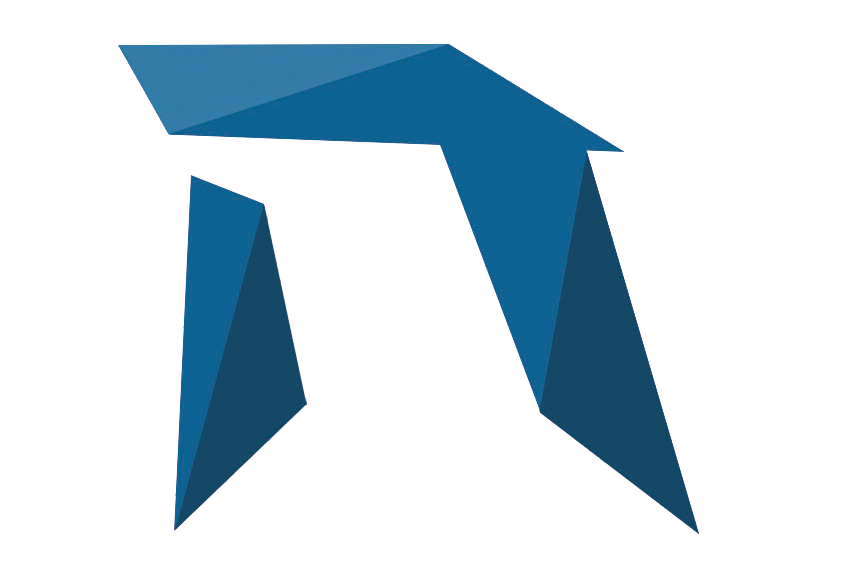

***
# HEICODERS ACADEMY
<b>Python Workplace Automation: Generate PDF Reports</b><br>

Expected Output
--

Here, we will use the FPDF python library to write a simple code that can progammatically generate a 2-page PDF report. The image below shows the exact report that we will be generating.

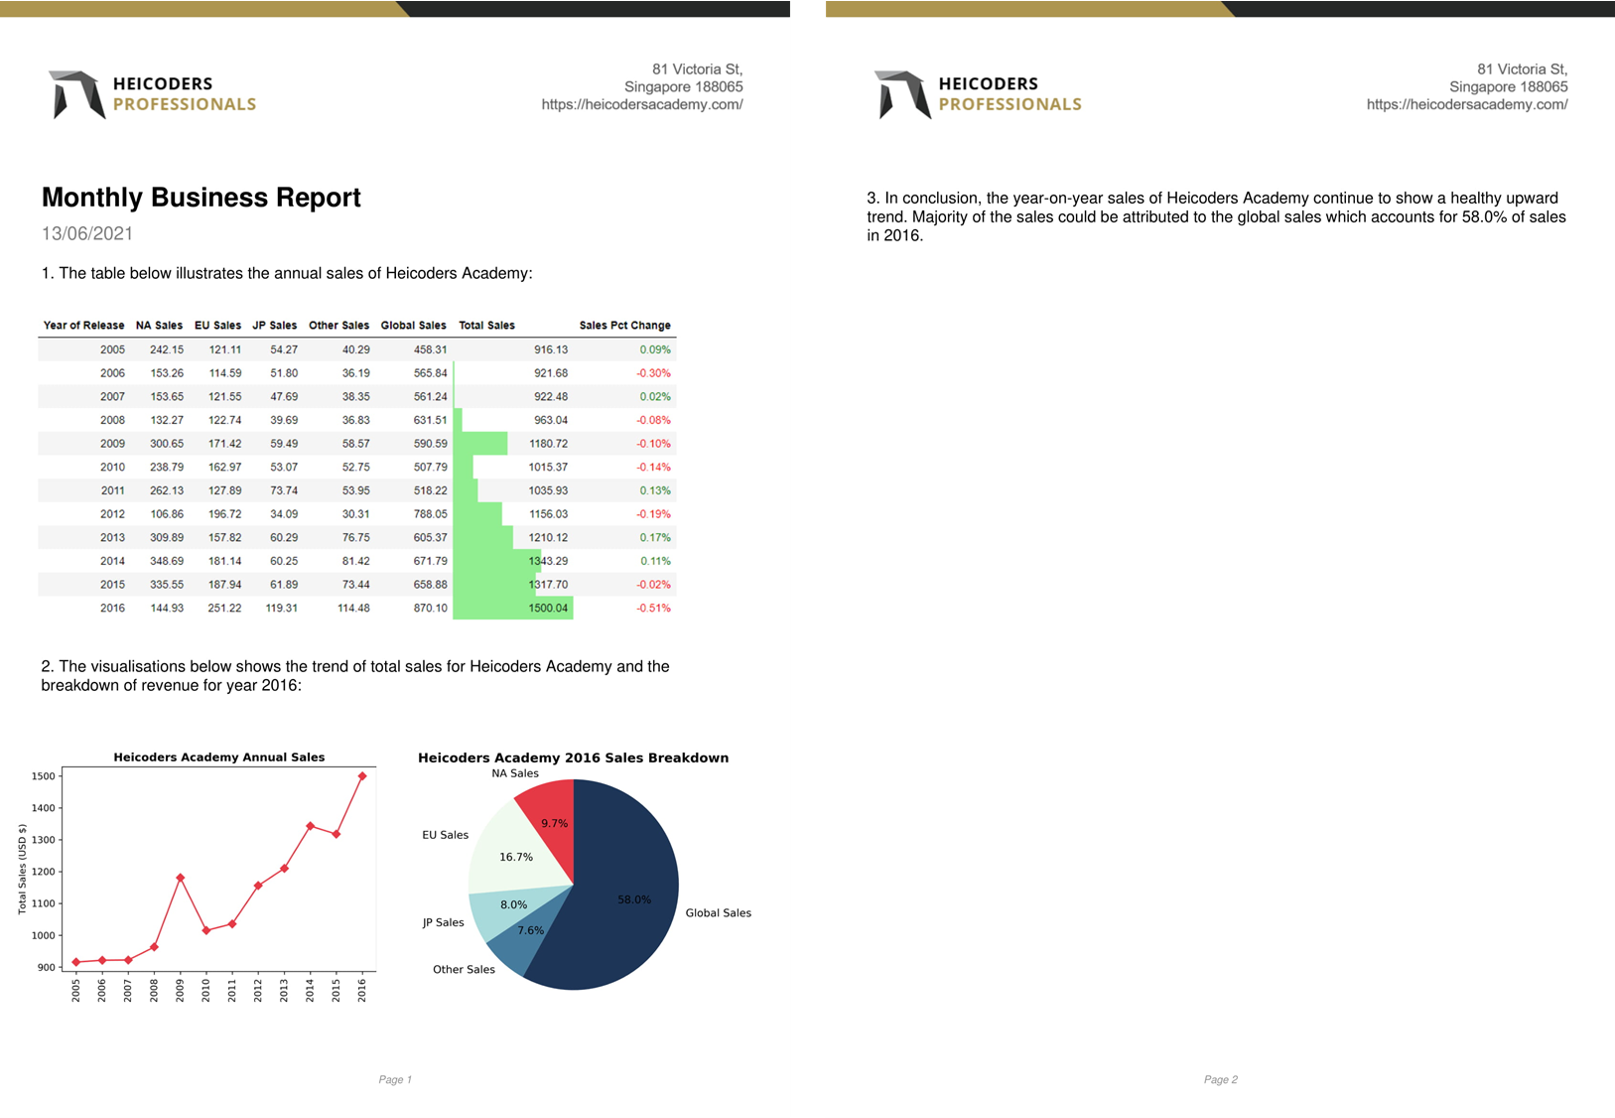

File Directory
--

The following image shows the file directory of the template codes for this project:

1. <b>Data</b> stores the CSV containing the data which you want to display in the PDF
2. <b>Resources</b> is used to store any images (including the ones you programmatically generated from your visualisations) which you want to add to the PDF
3. <b>annual_performance_report</b> is the PDF that was generated by your codes. You can arbitrarily change the name of the PDF in your codes later
4. <b>Generate PDF Reports Using Python.ipynb</b> is essentially this very notebook which you are working on

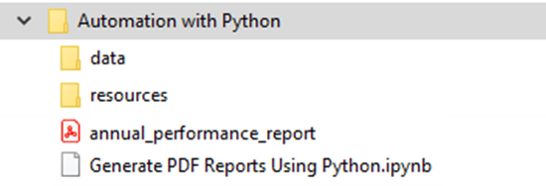

There are 5 main steps to programmatically generate a proper PDF report:
1. Install / import libraries
2. Data ingestion / processing
3. Data visualization
4. Write PDF utility functions
5. Create PDF report

1.Install / import libraries
--
Before we begin, we need to install the libraries which we will be using to process data/generate the PDF report

In [102]:
# Install the fpdf library if you don't already have it
!pip install fpdf
!pip install kaleido
!pip install dataframe_image
!pip install pandas

Thereafter, we will import all libraries which we will be using for this application

In [9]:
import fpdf
from fpdf import FPDF
import pandas as pd
import dataframe_image as dfi
import time
import matplotlib.pyplot as plt 

2.Data ingestion / processing
--
Here, we will read the data from a CSV using <code>read_csv()</code> from the Pandas library.

In [2]:
# Read data from CSV into dataframe
df = pd.read_csv("data/Annual_Sales.csv")
df

,Year of Release,NA Sales,EU Sales,JP Sales,Other Sales,Global Sales,Total Sales,Sales Pct Change
0,2005,242.15,121.11,54.27,40.29,458.31,916.13,0.093586
1,2006,153.26,114.59,51.80,36.19,565.84,921.68,-0.299093
2,2007,153.65,121.55,47.69,38.35,561.24,922.48,0.015175
3,2008,132.27,122.74,39.69,36.83,631.51,963.04,-0.082272
4,2009,300.65,171.42,59.49,58.57,590.59,1180.72,-0.103954
5,2010,238.79,162.97,53.07,52.75,507.79,1015.37,-0.140042
6,2011,262.13,127.89,73.74,53.95,518.22,1035.93,0.130767
7,2012,106.86,196.72,34.09,30.31,788.05,1156.03,-0.191557
8,2013,309.89,157.82,60.29,76.75,605.37,1210.12,0.168148
9,2014,348.69,181.14,60.25,81.42,671.79,1343.29,0.110047


<b> Optional Step:</b> This next step is optional, and is purely for <b>aesthetics purposes</b>.
1. First we write a function to colors elements in a dateframe green if positive and red if negative
2. Next, we use the <code>style</code> attribute to format and style the dataframe. We also make use of the <code>applymap()</code> function to apply the <code>color_pos_neg_value()</code> function we wrote to the dataframe.
3. Finally, the styled dataframe is stored in a variable <code>styled_df</code>.

In [3]:
# This function colors elements in a dateframe green if positive and red if negative. Does not color NaN values.
def color_pos_neg_value(value):

    if value < 0:
        color = 'red'
    elif value > 0:
        color = 'green'
    else:
        color = 'black'

    return 'color: %s' % color

# Apply styling to dataframe
styled_df = df.style.format({'Year of Release': "{:.0f}",
                      'NA Sales': "{:.2f}",
                      'EU Sales': "{:.2f}",
                      'JP Sales': "{:.2f}",
                      'Other Sales': "{:.2f}",
                      'Global Sales': "{:.2f}",
                      'Total Sales': "{:.2f}",
                      'Sales Pct Change': "{:.2f}%",
                     }).hide_index().bar(subset=["Total Sales",], color='lightgreen').applymap(color_pos_neg_value, subset=['Sales Pct Change'])

styled_df

Year of Release,NA Sales,EU Sales,JP Sales,Other Sales,Global Sales,Total Sales,Sales Pct Change
2005,242.15,121.11,54.27,40.29,458.31,916.13,0.09%
2006,153.26,114.59,51.80,36.19,565.84,921.68,-0.30%
2007,153.65,121.55,47.69,38.35,561.24,922.48,0.02%
2008,132.27,122.74,39.69,36.83,631.51,963.04,-0.08%
2009,300.65,171.42,59.49,58.57,590.59,1180.72,-0.10%
2010,238.79,162.97,53.07,52.75,507.79,1015.37,-0.14%
2011,262.13,127.89,73.74,53.95,518.22,1035.93,0.13%
2012,106.86,196.72,34.09,30.31,788.05,1156.03,-0.19%
2013,309.89,157.82,60.29,76.75,605.37,1210.12,0.17%
2014,348.69,181.14,60.25,81.42,671.79,1343.29,0.11%


Lastly, we will export the dataframe as an image, and store it in the <code>resources</code> folder. We are exporting the dataframe as an image to add it to the PDF report.

In [4]:
dfi.export(styled_df, 'resources/annual_sales.png')

<div class="alert alert-block alert-warning">
For the FPDF library, it is much easier to add images than tables to a PDF, which is why we are converting the dataframe to an image first before later adding it to our PDF</div>

3.Data visualization
--

For our particular report, we are intending to add 2 charts to the PDF: (1) line chart to show trend, and (2) pie chart to show component breakdown. Here we make use of Matplotlib to generate the charts, and we wrap the codes for generating the line and pie chart into two methods respectively:

- <code>generate_matplotlib_stackbars()</code>
- <code>generate_matplotlib_piechart()</code>

Those that have taken Heicoders Academy's AI100 should be very familiar with how to use Matplotlib to generate simple charts. For those that have take AI200, you can also use the Plotly library instead to generate your visualisations.

In [5]:
def generate_matplotlib_stackbars(df, filename):
    
    # Create subplot and bar
    fig, ax = plt.subplots()
    ax.plot(df['Year of Release'].values, df['Total Sales'].values, color="#E63946", marker='D') 

    # Set Title
    ax.set_title('Heicoders Academy Annual Sales', fontweight="bold")

    # Set xticklabels
    ax.set_xticklabels(df['Year of Release'].values, rotation=90)
    plt.xticks(df['Year of Release'].values)

    # Set ylabel
    ax.set_ylabel('Total Sales (USD $)') 

    # Save the plot as a PNG
    plt.savefig(filename, dpi=300, bbox_inches='tight', pad_inches=0)
    
    plt.show()
    
def generate_matplotlib_piechart(df, filename):
    
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = ["NA Sales", "EU Sales", "JP Sales", "Other Sales", "Global Sales"]
    sales_value = df[["NA Sales", "EU Sales", "JP Sales", "Other Sales", "Global Sales"]].tail(1)

    # Colors
    colors = ['#E63946','#F1FAEE','#A8DADC','#457B9D','#1D3557', '#9BF6FF']
    
    # Create subplot
    fig, ax = plt.subplots()
    
    # Generate pie chart
    ax.pie(sales_value, labels=labels, autopct='%1.1f%%', startangle=90, colors = colors)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    # Set Title
    ax.set_title('Heicoders Academy 2016 Sales Breakdown', fontweight="bold")

    # Save the plot as a PNG
    plt.savefig(filename, dpi=300, bbox_inches='tight', pad_inches=0)
    
    plt.show()

<div class="alert alert-block alert-warning">
One thing to note is that we use the <code>plt.savefig()</code> to save a copy of the visualisation generated in the form of an image. Again, this is because it is easier to add images rather than visualisations to our PDF.
</div>

Next, we invoke the two functions we wrote to generate the charts!

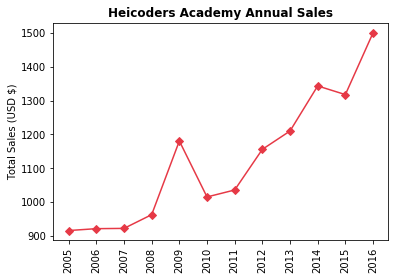

C:\Users\Dreambuilds\anaconda3\lib\site-packages\ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


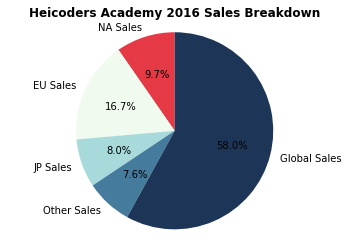

In [6]:
generate_matplotlib_stackbars(df, 'resources/heicoders_annual_sales.png')
generate_matplotlib_piechart(df, 'resources/heicoders_2016_sales_breakdown.png')

4.Write PDF utility functions
--

Before we begin creating the PDF itself, we will write some utility methods. Here we have written <b>3 utility methods:</b>

1. <code>create_letterhead()</code> - This function uses the <code>image()</code> function in the FPDF library to add image to the PDF. Here, we make use of this function to add a nice letterhead to our PDF.
2. <code>create_title()</code> - This function helps create and add a title to your PDF
3. <code>write_to_pdf()</code> - This function takes in the pdf and a string, and add that string to the PDF

In [16]:
def create_letterhead(pdf, WIDTH):
    pdf.image("./resources/heicoders_letterhead_cropped.png", 0, 0, WIDTH)

def create_title(title, pdf):
    
    # Add main title
    pdf.set_font('Helvetica', 'b', 20)  
    pdf.ln(40)
    pdf.write(5, title)
    pdf.ln(10)
    
    # Add date of report
    pdf.set_font('Helvetica', '', 14)
    pdf.set_text_color(r=128,g=128,b=128)
    today = time.strftime("%d/%m/%Y")
    pdf.write(4, f'{today}')
    
    # Add line break
    pdf.ln(10)

def write_to_pdf(pdf, words):
    
    # Set text colour, font size, and font type
    pdf.set_text_color(r=0,g=0,b=0)
    pdf.set_font('Helvetica', '', 12)
    
    pdf.write(5, words)

Here we extend the python PDF class in order to modify the footer method to add a page number to our PDF.

In [19]:
class PDF(FPDF):

    def footer(self):
        self.set_y(-15)
        self.set_font('Helvetica', 'I', 8)
        self.set_text_color(128)
        self.cell(0, 10, 'Page ' + str(self.page_no()), 0, 0, 'C')

5.Create PDF report
--

Lastly, the following cell is the code which will assemble all components and generate your PDF!

In [20]:
# Global Variables
TITLE = "Monthly Business Report"
WIDTH = 210
HEIGHT = 297

# Create PDF
pdf = PDF() # A4 (210 by 297 mm)


'''
First Page of PDF
'''
# Add Page
pdf.add_page()

# Add lettterhead and title
create_letterhead(pdf, WIDTH)
create_title(TITLE, pdf)

# Add some words to PDF
write_to_pdf(pdf, "1. The table below illustrates the annual sales of Heicoders Academy:")
pdf.ln(15)

# Add table
pdf.image("./resources/annual_sales.png", w=170)
pdf.ln(10)

# Add some words to PDF
write_to_pdf(pdf, "2. The visualisations below shows the trend of total sales for Heicoders Academy and the breakdown of revenue for year 2016:")

# Add the generated visualisations to the PDF
pdf.image("resources/heicoders_annual_sales.png", 5, 200, WIDTH/2-10)
pdf.image("resources/heicoders_2016_sales_breakdown.png", WIDTH/2, 200, WIDTH/2-10)
pdf.ln(10)


'''
Second Page of PDF
'''

# Add Page
pdf.add_page()

# Add lettterhead
create_letterhead(pdf, WIDTH)

# Add some words to PDF
pdf.ln(40)
write_to_pdf(pdf, "3. In conclusion, the year-on-year sales of Heicoders Academy continue to show a healthy upward trend. Majority of the sales could be attributed to the global sales which accounts for 58.0% of sales in 2016.")
pdf.ln(15)

# Generate the PDF
pdf.output("annual_performance_report.pdf", 'F')

''